# Basics of gPLB

by Kow Kuroda

This document explains how to use gPLB briefly.

Modified on 2025/11/01

In [1]:
## Parameters for Pattern Lattice Builder
verbose     = True

## Preparation for multiprocess
use_mp       = True
if use_mp:
    import os
    n_cores = max(1, round(os.cpu_count()/2) + 1)
else:
    n_cores = 1
print(f"n_cores: {n_cores}")

## set font for Japanese character display
## This needs to be True if you have multibyte characters in data
use_multibyte_chars = False
print(f"use_multibyte_chars: {use_multibyte_chars}")

n_cores: 5
use_multibyte_chars: False


In [2]:
## leaders of comment in data
comment_escapes  = [ '#', '%' ]

In [3]:
## select target file
from pathlib import Path
wd = Path("./data3-morpho")
target_files = list(wd.glob('*.txt')) + list(wd.glob('*.csv'))
import pprint as pp
pp.pprint(f"target files: {target_files}")

("target files: [PosixPath('data3-morpho/pl-undoing.csv'), "
 "PosixPath('data3-morpho/pl-ring-sing.csv'), "
 "PosixPath('data3-morpho/pl-Fictive-taba.csv'), "
 "PosixPath('data3-morpho/pl-happiness.csv'), "
 "PosixPath('data3-morpho/pl-right.csv'), "
 "PosixPath('data3-morpho/pl-ring-sing-bring.csv'), "
 "PosixPath('data3-morpho/pl-ring-sing-bring-fight.csv'), "
 "PosixPath('data3-morpho/pl-Arabic-kataba-n.csv'), "
 "PosixPath('data3-morpho/pl-drink-ring.csv'), "
 "PosixPath('data3-morpho/pl-undigging.csv'), "
 "PosixPath('data3-morpho/pl-Arabic-kataba-v.csv'), "
 "PosixPath('data3-morpho/pl-drink.csv'), "
 "PosixPath('data3-morpho/pl-dig-dag.csv'), "
 "PosixPath('data3-morpho/pl-undo-redo.csv'), "
 "PosixPath('data3-morpho/pl-sigh.csv')]")


In [4]:
## select one target file
target_file  = target_files[-1]
print(f"target file: {target_file}")

target file: data3-morpho/pl-sigh.csv


In [5]:
## load data
with open(target_file, 'r') as f:
    lines = [ line.strip() for line in f.readlines() if len(line) > 0 ]
print(lines)

['s;i;g,h', 's;i;g,h;t', 'l;i;g,h;t', 'l;i,e', 'd;i,e', 'h;i;g,h', 't;i,e', 'w;e,i;g,h', 'w;e,i;g,h;t', 'w,h;i;t,e']


In [6]:
## import gPLB
import gPLB as plb

In [7]:
## strip comments
lines = [ plb.strip_comment(line, comment_escapes) for line in lines ]
lines

['s;i;g,h',
 's;i;g,h;t',
 'l;i;g,h;t',
 'l;i,e',
 'd;i,e',
 'h;i;g,h',
 't;i,e',
 'w;e,i;g,h',
 'w;e,i;g,h;t',
 'w,h;i;t,e']

In [8]:
## lowercase
use_lowercase = True
if use_lowercase:
    lines = [ line.lower() for line in lines ]
lines

['s;i;g,h',
 's;i;g,h;t',
 'l;i;g,h;t',
 'l;i,e',
 'd;i,e',
 'h;i;g,h',
 't;i,e',
 'w;e,i;g,h',
 'w;e,i;g,h;t',
 'w,h;i;t,e']

In [9]:
## filter lines by regex if necessary
pattern_filtering = False
filter_pattern = r'.*g.*'
if pattern_filtering:
    import re
    filtered_lines = [ line for line in lines if re.match(filter_pattern, line) ]
else:
    filtered_lines = lines
print(f"filtered_lines has {len(filtered_lines)} entries")
print(f"filtered_lines: {filtered_lines}")

filtered_lines has 10 entries
filtered_lines: ['s;i;g,h', 's;i;g,h;t', 'l;i;g,h;t', 'l;i,e', 'd;i,e', 'h;i;g,h', 't;i,e', 'w;e,i;g,h', 'w;e,i;g,h;t', 'w,h;i;t,e']


In [10]:
### segmentationo
## set field separator
if str(target_file).endswith(".csv"):
    field_seps = r",;"
else:
    field_seps = r""
print(f"field_seps: '{field_seps}'")

## set phrase segmentation parameters
use_larger_segments = True
if use_larger_segments:
    sep2_is_suppressive = True
else:
    sep2_is_suppressive = False
print(f"sep2_is_suppressive: {sep2_is_suppressive}")

field_seps: ',;'
sep2_is_suppressive: True


In [11]:
## split line into fields
import gPLB as plb
data = [ plb.segment_with_levels(line, seps = field_seps, sep2_is_suppressive = sep2_is_suppressive, split_hyphenation = False, uncapitalize = False, normalize = True) for line in filtered_lines ]
pp.pprint(f"data: {data}")

("data: [['s', 'i', 'gh'], ['s', 'i', 'gh', 't'], ['l', 'i', 'gh', 't'], ['l', "
 "'ie'], ['d', 'ie'], ['h', 'i', 'gh'], ['t', 'ie'], ['w', 'ei', 'gh'], ['w', "
 "'ei', 'gh', 't'], ['wh', 'i', 'te']]")


In [12]:
## filter lines by length
size_filtering = True
min_length =  2
max_length =  4
if size_filtering:
    data = [ item for item in data if min_length <= len(item) and len(item) <= max_length ]
else:
    data = data
print(f"data has {len(data)} entries")

import pprint as pp
pp.pprint(data)

data has 10 entries
[['s', 'i', 'gh'],
 ['s', 'i', 'gh', 't'],
 ['l', 'i', 'gh', 't'],
 ['l', 'ie'],
 ['d', 'ie'],
 ['h', 'i', 'gh'],
 ['t', 'ie'],
 ['w', 'ei', 'gh'],
 ['w', 'ei', 'gh', 't'],
 ['wh', 'i', 'te']]


In [13]:
## get graph_layout parameters
n_items    = len(data)
max_n_segs = max(map(len, data))
print(f"max_n_segs: {max_n_segs}, n_items: {n_items}")

max_n_segs: 4, n_items: 10


In [14]:
## install required packages
#!conda install matplotlib multiprocess networkx -y

In [15]:
## parameters for PLB
gap_marks      = [ "…", "_" ]
gap_mark       = gap_marks[0]
tracer         = "~"

## if instantiation check is reflexive
reflexive      = True

## if node pooling is reductive
reductive      = True

##
p_metrics = ['rank', 'gap_size', 'size']
p_metric = p_metrics[0]

## if robust Z-score is used instead of normal Z-score
use_robust_zscore   = True

## select the bases of z-scores: link sources or link targets
zscores_from_targets = False

In [16]:
## Settings for font
## Windows will require other configuration
def setup_font(system_font_dir: str = "/System/Library/Fonts/", # Mac only 
        user_font_dir: str = "/Library/Fonts/", # Mac only
        # use the version installed via TeXLive
        user_font_dir2: str = "/usr/local/texlive/2013/texmf-dist/fonts/truetype/public/ipaex/"
        ):
    import matplotlib
    from matplotlib import font_manager as Font_manager
    if use_multibyte_chars:
        ## select font
        multibyte_font_names = [    "IPAexGothic",  # 0 Multi-platform font
                                    "Hiragino sans" # 1 Mac only
                                ]
        multibyte_font_name  = multibyte_font_names[0]
        ## tell where target fonts are
        if multibyte_font_name == "IPAexGothic":
            try:
                Font_manager.fontManager.addfont(f"{user_font_dir}ipaexg.ttf")
            except FileNotFoundError:
                Font_manager.fontManager.addfont(f"{user_font_dir2}ipaexg.ttf")
        elif multibyte_font_name == "Hiragino sans":
            Font_manager.fontManager.addfont(f"{system_font_dir}ヒラギノ角ゴシック W0.ttc")
        ## check result
        matplotlib.rc('font', family = multibyte_font_name)
    else:
        multibyte_font_name = None
        matplotlib.rcParams['font.family'] = "Sans-serif"
    ##
    print(f"multibyte_font_name: {multibyte_font_name}")
    print(f"matplotlib.rcParams['font.family']: {matplotlib.rcParams['font.family']}")
    ##
    return multibyte_font_name

In [17]:
#!conda install multiprocess networkx seaborn -y

In [18]:
## build a Pattern object from each source, i.e., list,
## build a Pattern Lattice from it, and then gather
## Pattern Lattices by generality
PLs_by_generality = {}
## loop over generality levels
generalities = [0,1,2,3]
for g in generalities:
    PLs = [ ]
    for item in data:
        ## build a Patter for each item
        pat    = plb.Pattern(item, gap_mark, tracer)
        patlat = plb.PatternLattice(pat, reflexive = reflexive, generality = g)
        if verbose:
            print(patlat)
        PLs.append(patlat)
    PLs_by_generality[g] = PLs

PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])])])
PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i'

In [19]:
## Merge individual PLs into a single PL and calculate z-scores
MPLs_by_generality = {}
for g, PLs in PLs_by_generality.items():
    print(f"Merging PLs into a single PL at generality {g}...")
    MPL = plb.merge_pattern_lattices(PLs, generality = g, gen_links_internally = True, use_mp = use_mp, reflexive = True, reductive = True, check = False)
    ## z-sccores
    print(f"Calculating z-scores...")
    plb.gen_zscores_from_sources_by (p_metric, MPL, gap_mark = gap_mark, tracer = tracer, use_robust_zscore = use_robust_zscore, check = False)
    plb.gen_zscores_from_targets_by (p_metric, MPL, gap_mark = gap_mark, tracer = tracer, use_robust_zscore = use_robust_zscore, check = False)
    MPLs_by_generality[g] = MPL
print("Done")

Merging PLs into a single PL at generality 0...
## Merging 10 PLs...
## Updating links...
Calculating z-scores...
# source   0: ('…', '…') has 4 out-link(s) at rank 0 [z-score: -2.698]
# source   1: ('l', '…') has 1 out-link(s) at rank 1 [z-score: -1.349]
# source   2: ('…', 'ie') has 3 out-link(s) at rank 1 [z-score: 0.000]
# source   3: ('d', '…') has 1 out-link(s) at rank 1 [z-score: -1.349]
# source   4: ('t', '…') has 1 out-link(s) at rank 1 [z-score: -1.349]
# source   5: ('…', '…', '…') has 9 out-link(s) at rank 0 [z-score: 0.674]
# source   6: ('s', '…', '…') has 2 out-link(s) at rank 1 [z-score: -0.674]
# source   7: ('…', 'i', '…') has 5 out-link(s) at rank 1 [z-score: 1.349]
# source   8: ('…', '…', 'gh') has 5 out-link(s) at rank 1 [z-score: 1.349]
# source   9: ('h', '…', '…') has 2 out-link(s) at rank 1 [z-score: -0.674]
# source  10: ('w', '…', '…') has 2 out-link(s) at rank 1 [z-score: -0.674]
# source  11: ('…', 'ei', '…') has 2 out-link(s) at rank 1 [z-score: -0.674]


In [20]:
## print forms
print_forms = True
seg_joint = ", "
for i, MPL in MPLs_by_generality.items():
    print(f"g{i}PL: {MPL}")
    if print_forms:
        print(f"Patterns (= skippy n-grams) in g{i}PL")
        for j, node in enumerate(MPL.nodes):
            print(f"g{i}PL has node{j:03d}: {seg_joint.join(node.get_form())}")

g0PL: PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['

In [21]:
# Visualization

In [31]:
## graph layout selection
graph_layouts = [   'Multi_partite', # 0
                    'Graphviz', # 1
                    'Fruchterman_Reingold', # 2
                    'ARF', # 3
                    'Kamada_Kawai', # 4
                    'Spectral', # 5
                    'Spring', # 6
                    'Breadth-First Search', # 7
                    'Circular', # 8
                    'Shell', # 9
                    'Planar', # 10
                 ]
#
graph_layout = graph_layouts[0]
print(f"graph_layout: {graph_layout}")

##
MPG_keys = ['gap_size', 'rank']
MPG_key  = MPG_keys[0]
print(f"MPG_key: {MPG_key}")

graph_layout: Multi_partite
MPG_key: gap_size


In [23]:
#!conda install networkx matplotlib -y 

In [24]:
#!conda install PyQt5 -y # fails
#!pip install -U PyQt5
#!conda update conda -y

multibyte_font_name: None
matplotlib.rcParams['font.family']: ['Sans-serif']
g0PL: PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), 

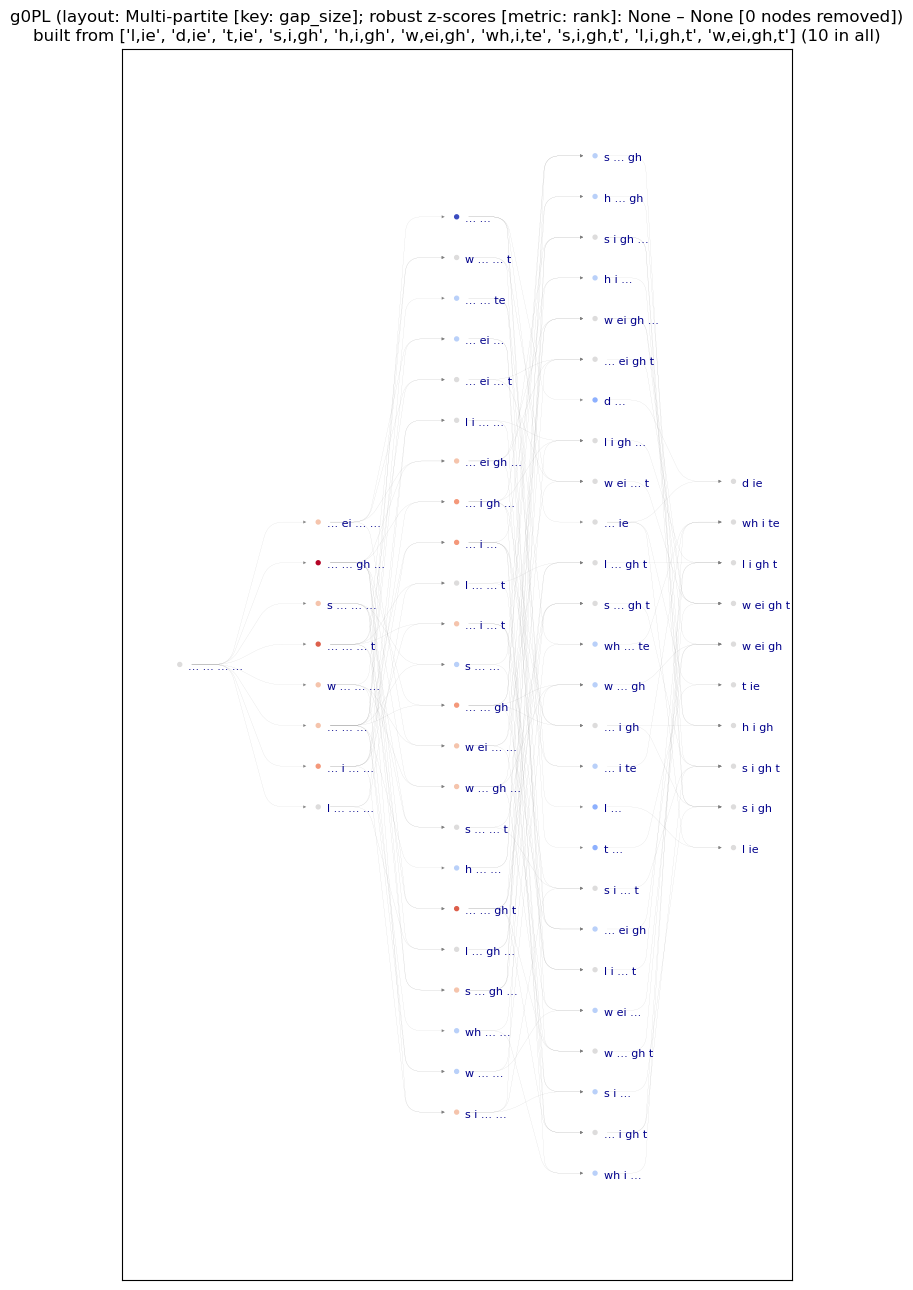

g1PL: PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['

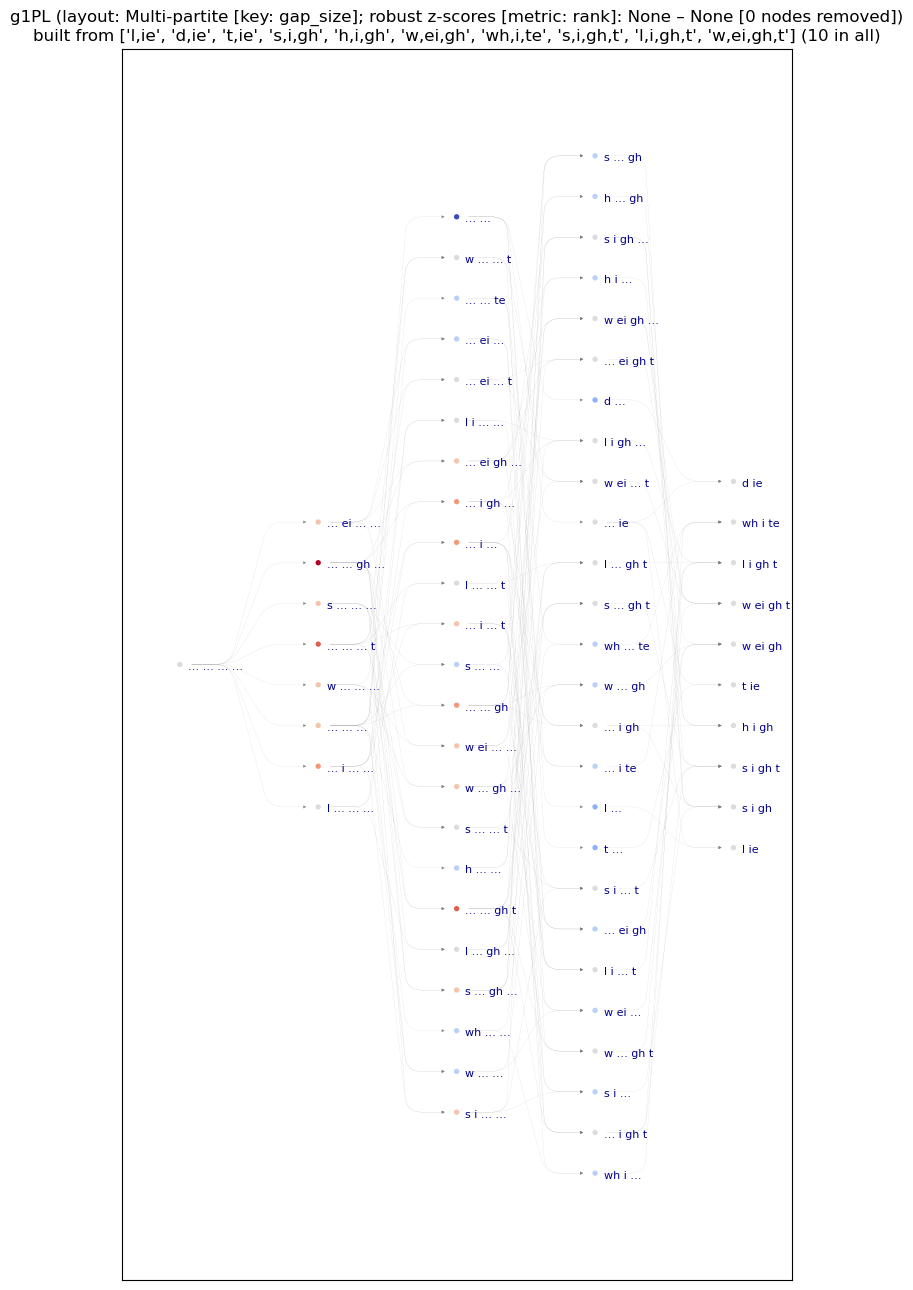

g2PL: PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['

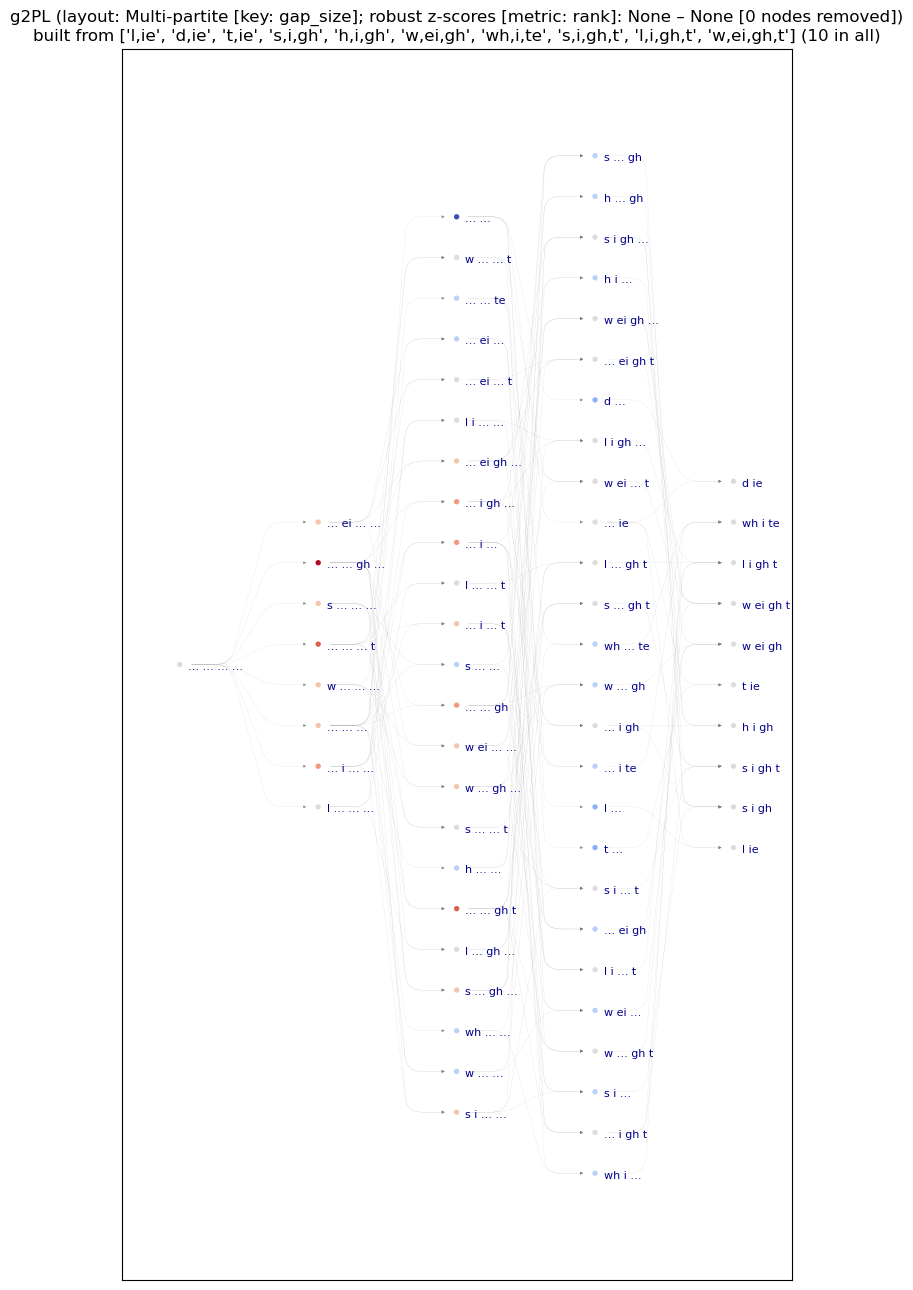

g3PL: PatternLattice ([Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('i', ['i']), ('…', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('gh', ['gh'])]), Pattern ([('…', ['s']), ('…', ['i']), ('…', ['gh'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('i', ['i']), ('…', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('gh', ['gh']), ('…', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['gh']), ('t', ['t'])]), Pattern ([('s', ['s']), ('…', ['i']), ('…', ['

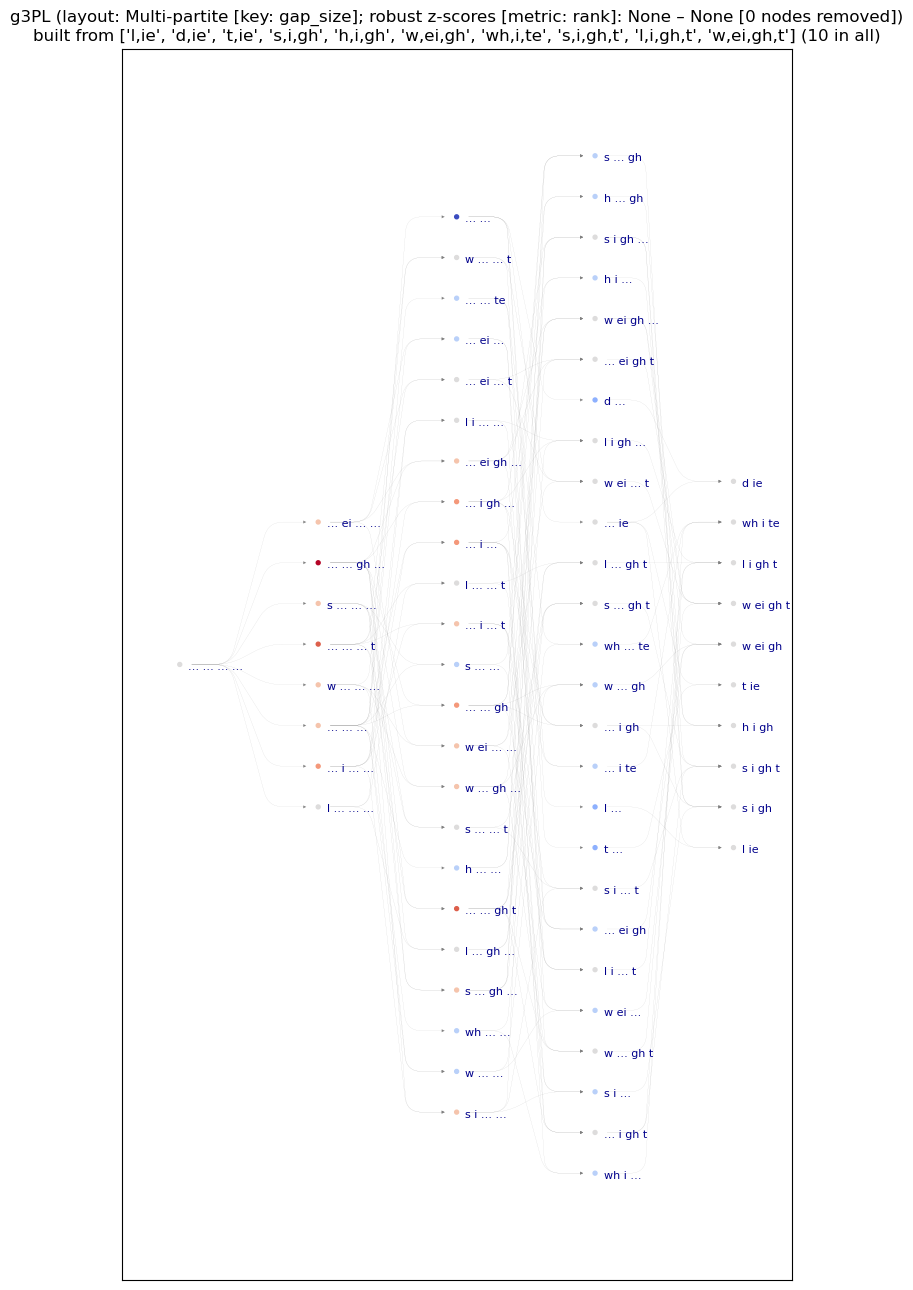

In [25]:
multibyte_font_name = setup_font()
for i, MPL in MPLs_by_generality.items():
    print(f"g{i}PL: {MPL}")
    MPL.draw_lattice (graph_layout, MPG_key, save_lattice = False, draw_inline = True, auto_figsizing = True, input_name = None, generality = i, zscores_from_targets = zscores_from_targets, font_name = multibyte_font_name)

In [26]:
#!conda install pydot -y

['Multi_partite', 'Graphviz', 'Fruchterman_Reingold', 'ARF', 'Kamada_Kawai', 'Spectral', 'Spring', 'Circular', 'Shell']
graph_layout: Multi_partite
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 13.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


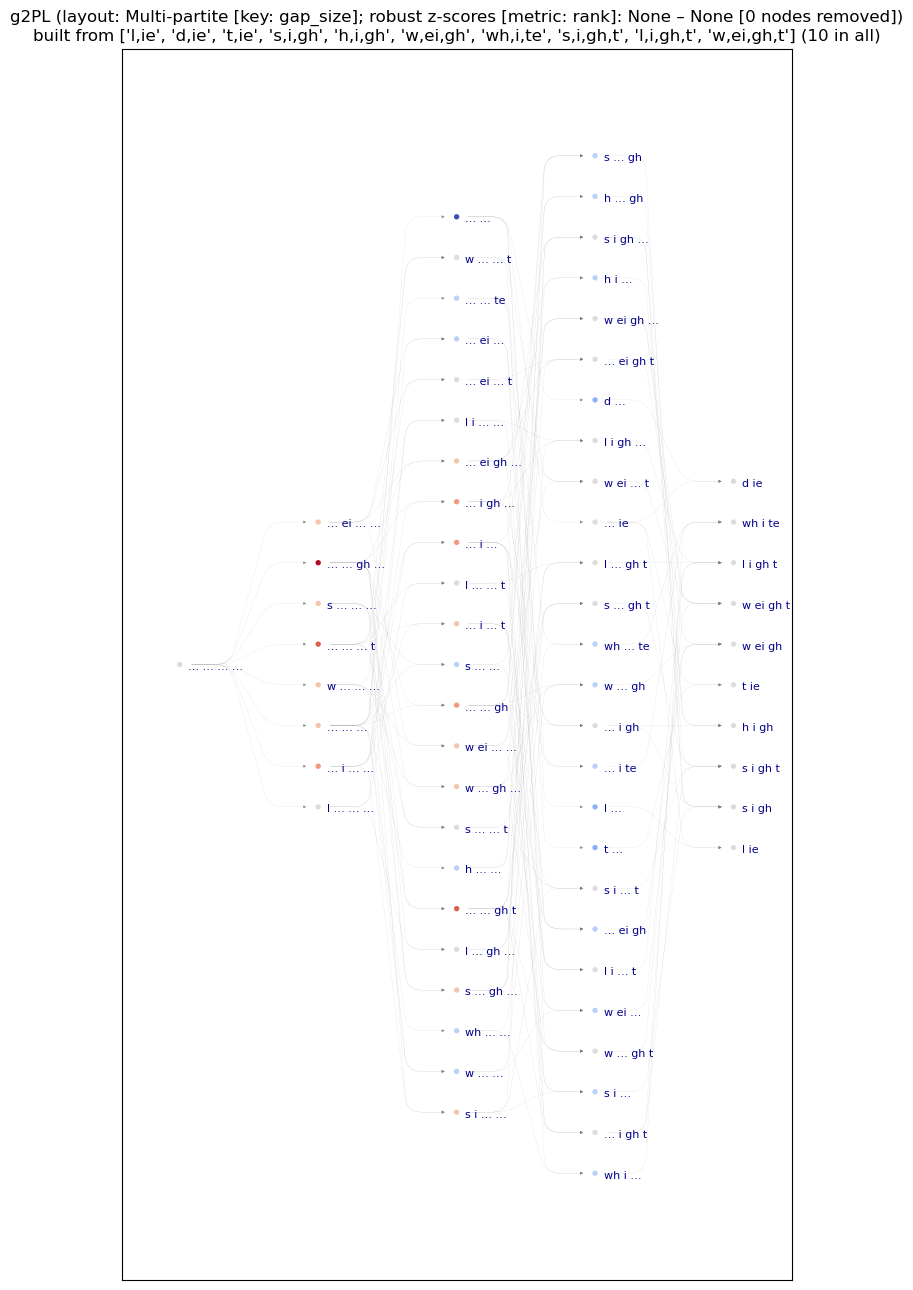

graph_layout: Graphviz
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


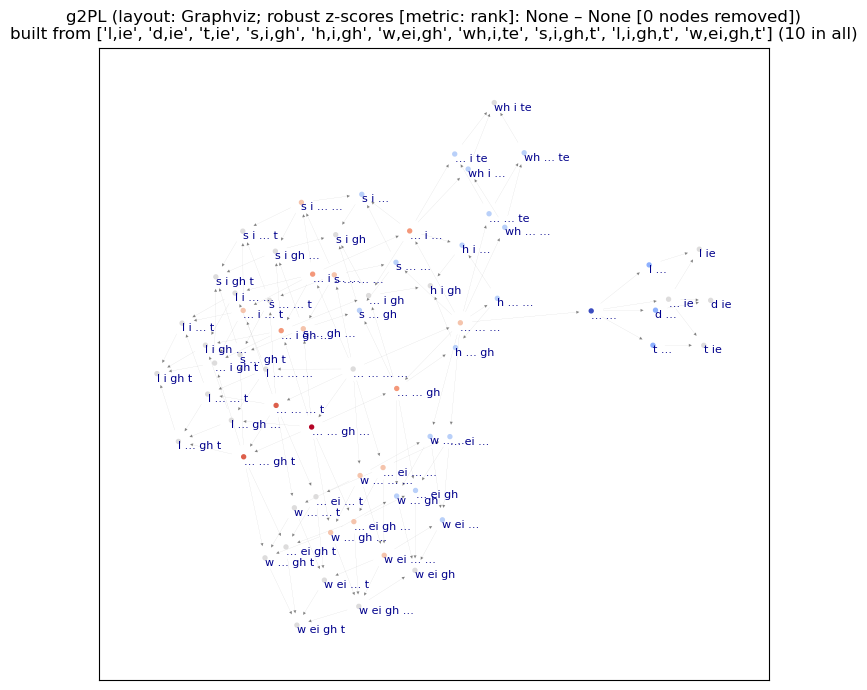

graph_layout: Fruchterman_Reingold
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


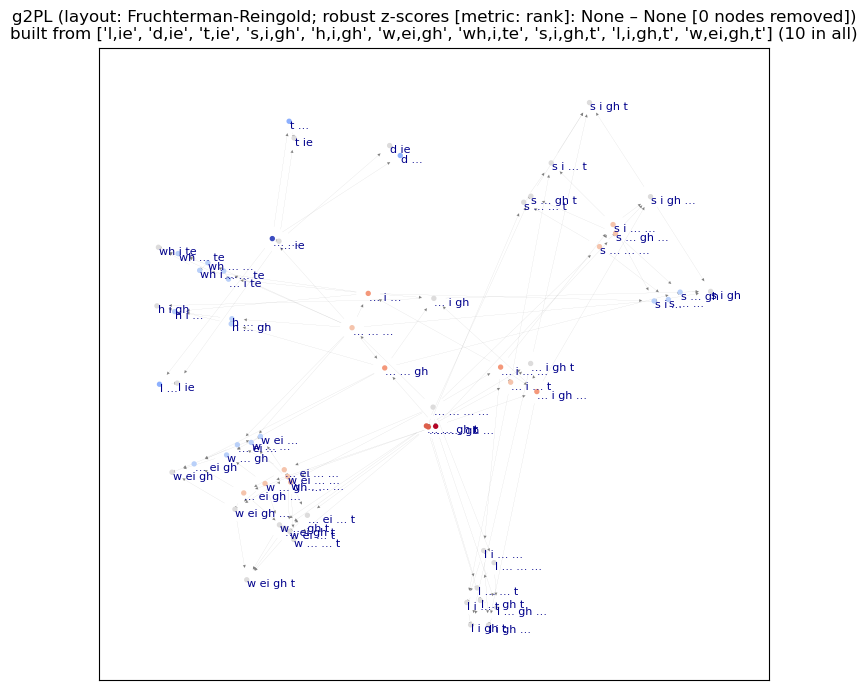

graph_layout: ARF
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


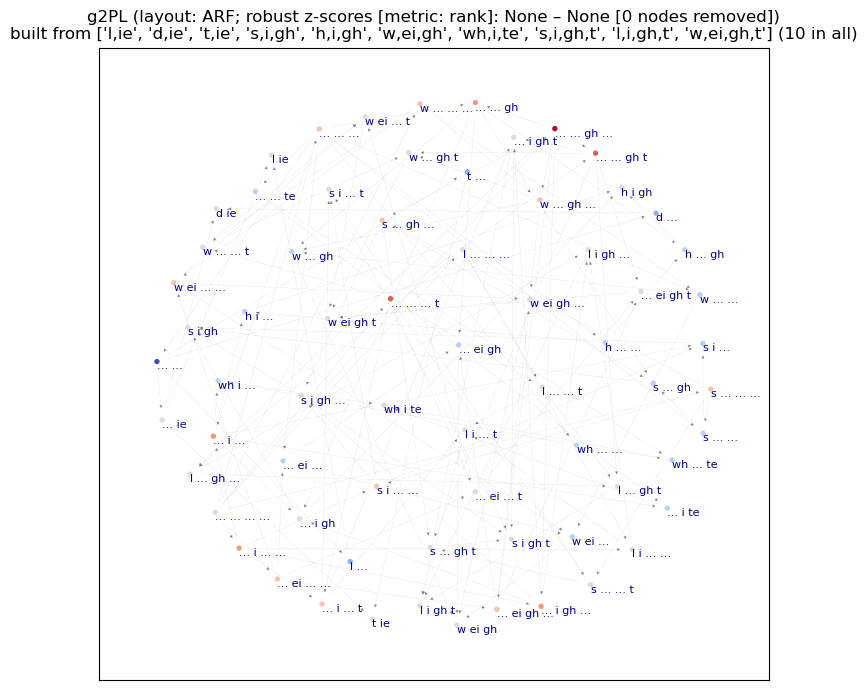

graph_layout: Kamada_Kawai
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


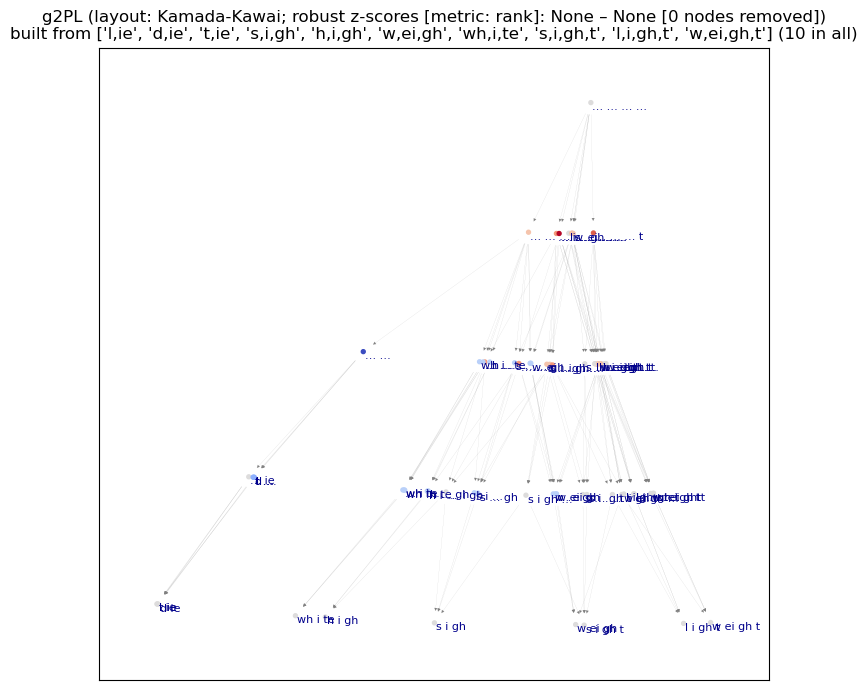

graph_layout: Spectral
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


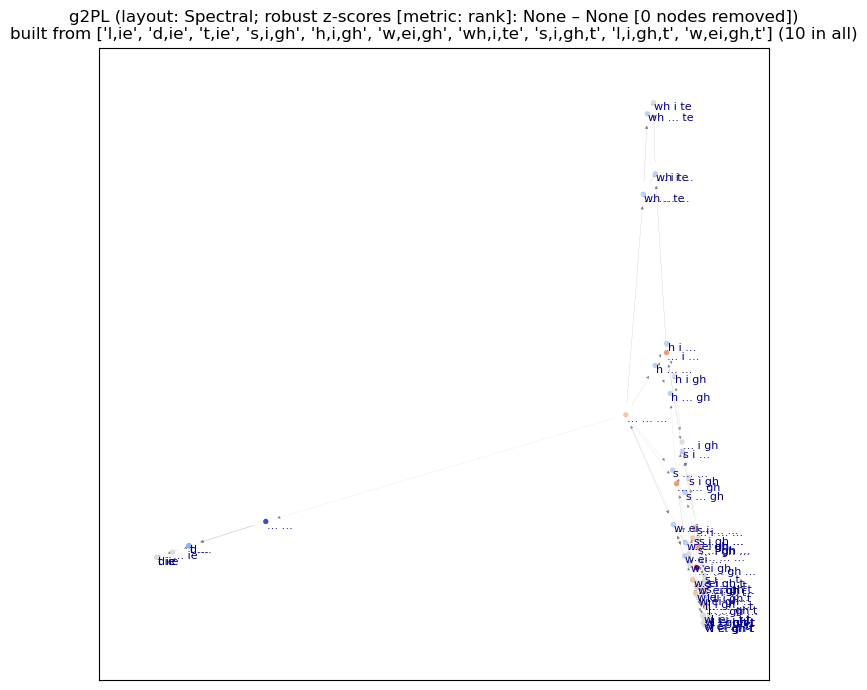

graph_layout: Spring
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


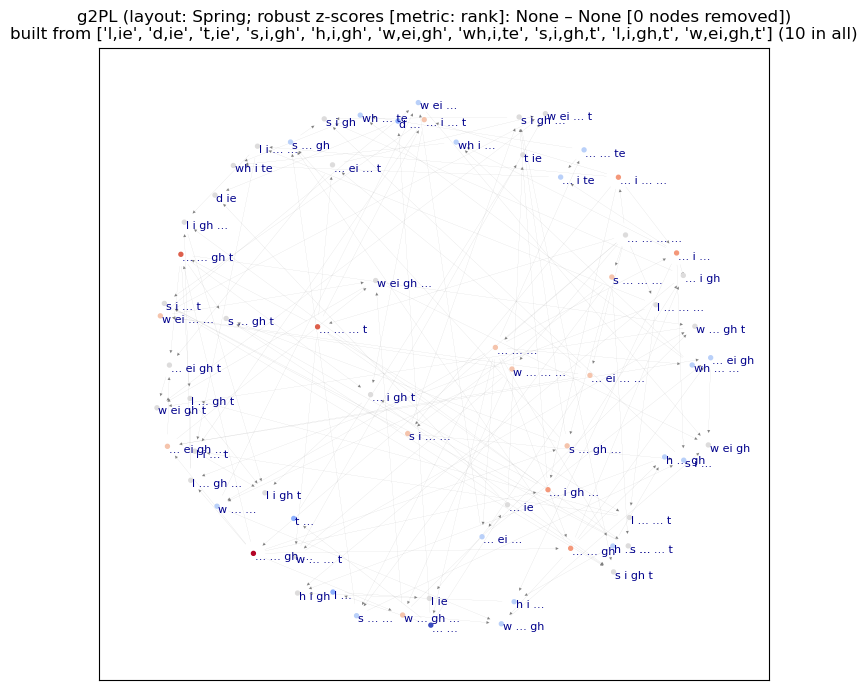

graph_layout: Circular
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


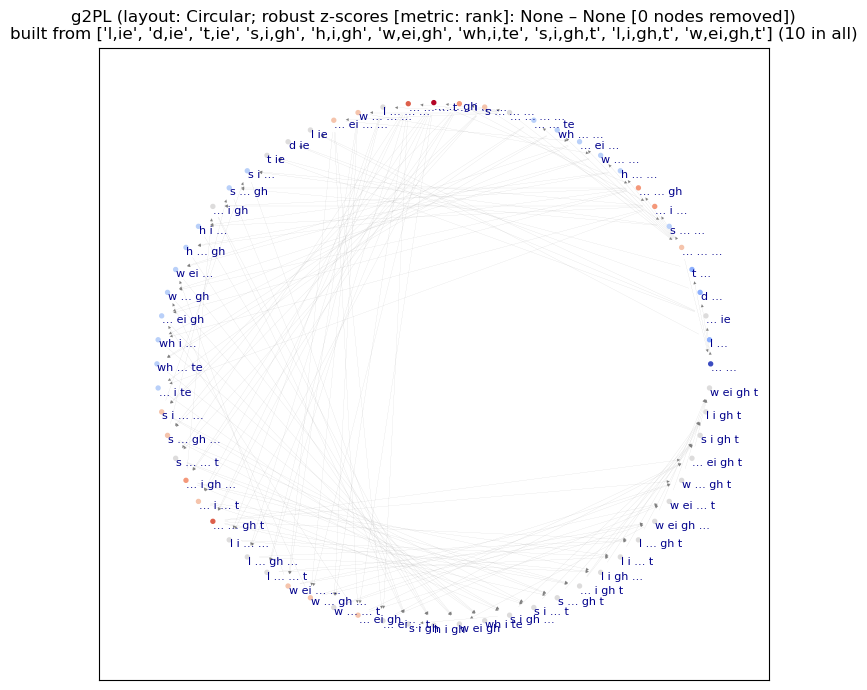

graph_layout: Shell
# label_sample_n: None
# MPG_key_count_max: 26
# MPG_group_size: 5
# n_instances: 10
# max_instance_n_segs: 4
# max_instance_size: 6
# fig_size: (7.0, 7.0)
# fig_dpi: 620
# node_size: 8.0
# label_size: 8.0
#instance_labels 10: ['l,ie', 'd,ie', 't,ie', 's,i,gh', 'h,i,gh', 'w,ei,gh', 'wh,i,te', 's,i,gh,t', 'l,i,gh,t', 'w,ei,gh,t']


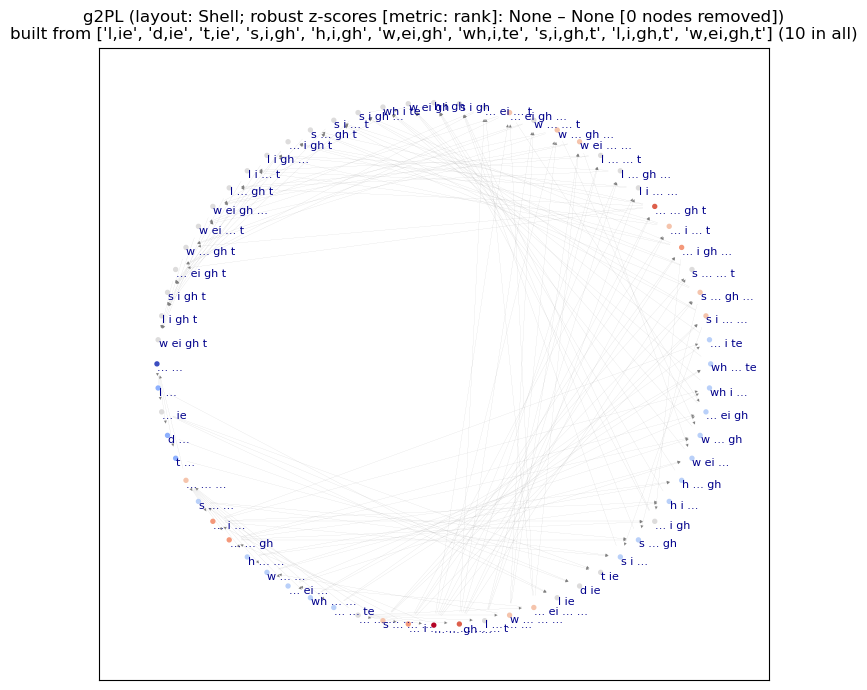

In [32]:
## Select a Merged Pattern Lattice and draws it in available layouts

target_generality = 2
targetMPL = MPLs_by_generality[target_generality]

## remove Planar if generalit is not 0
if target_generality != 0:
    graph_layouts = [ layout for layout in graph_layouts if layout not in ['Planar', 'Breadth-First Search' ] ]
print(graph_layouts)
for layout in graph_layouts:
    print(f"graph_layout: {layout}")
    try:
        targetMPL.draw_lattice (layout, MPG_key, save_lattice = False, draw_inline = True, generality = target_generality, zscores_from_targets = zscores_from_targets, font_name = multibyte_font_name)
    except NetworkXException as e:
        print(f"#NetworkXError: {e}")